In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/busan.csv', encoding= 'cp949', 
                 skiprows=7)

In [3]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9


##### 가장 더웠던날

In [4]:
df[df['최고기온(℃)'] == df['최고기온(℃)'].max()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
41035,2016-08-14,159,31.7,28.3,37.3


##### 일교차가 가장 큰 날

In [5]:
df['일교차'] = df['최고기온(℃)'] - df['최저기온(℃)']

In [6]:
df[df['일교차'] == df['일교차'].max()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차
28729,1982-12-05,159,3.9,-3.3,15.2,18.5


In [7]:
df.count()

날짜         43154
지점         43154
평균기온(℃)    43154
최저기온(℃)    43144
최고기온(℃)    43150
일교차        43143
dtype: int64

In [8]:
df[pd.isnull(df['최저기온(℃)'])]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차
2,1904-04-11,159,10.6,NaN,14.9,NaN
8,1904-04-17,159,10.3,NaN,12.6,NaN
11,1904-04-20,159,11.9,NaN,NaN,NaN
12,1904-04-21,159,12.1,NaN,18.3,NaN
17,1904-04-26,159,14.5,NaN,17.6,NaN
28,1904-05-07,159,16.1,NaN,21.9,NaN
37,1904-05-16,159,16.3,NaN,21.1,NaN
40,1904-05-19,159,16.3,NaN,22.8,NaN
22961,1967-02-19,159,2.7,NaN,NaN,NaN
25392,1973-10-16,159,15.9,NaN,NaN,NaN


In [9]:
import matplotlib.pyplot as plt

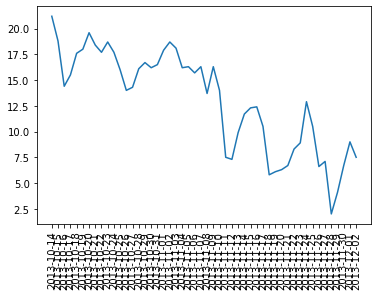

In [10]:
plt.plot(df['날짜'][40000:40050], df['평균기온(℃)'][40000:40050])
plt.xticks(df['날짜'][40000:40050], rotation = 90)
plt.show()

In [11]:
df['연도'] = df['날짜'].apply(lambda x : x.split('-')[0])
df['월'] = df['날짜'].apply(lambda x : x.split('-')[1])
df['일'] = df['날짜'].apply(lambda x : x.split('-')[2])
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차,연도,월,일
0,1904-04-09,159,11.3,7.8,16.1,8.3,1904,04,09
1,1904-04-10,159,9.3,4.7,15.2,10.5,1904,04,10
2,1904-04-11,159,10.6,NaN,14.9,NaN,1904,04,11
3,1904-04-12,159,11.3,8.8,13.4,4.6,1904,04,12
4,1904-04-13,159,14.5,11.1,16.9,5.8,1904,04,13


In [25]:
# 2000년 이후 연도만 리스트로 저장

year = df[df['연도'] >= '2000']['연도'].unique()
ticks = range(len(year))
print(year)
print(ticks)

['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022']
range(0, 23)


In [26]:
최고기온 = df[(df['연도'] >= '2000') &
              (df['월'] == '03') &
              (df['일'] == '01')]['최고기온(℃)']
최고기온.index = ticks

In [27]:
최저기온 = df[(df['연도'] >= '2000') &
              (df['월'] == '03') &
              (df['일'] == '01')]['최저기온(℃)']
최저기온.index = ticks

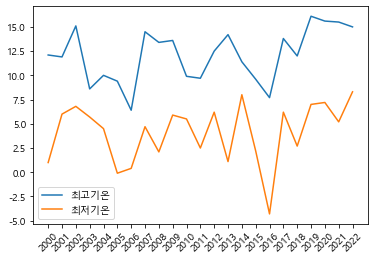

In [29]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.plot(최고기온, label='최고기온')
plt.plot(최저기온, label='최저기온')
plt.xticks(ticks, year, rotation=45)
plt.legend()
plt.show()

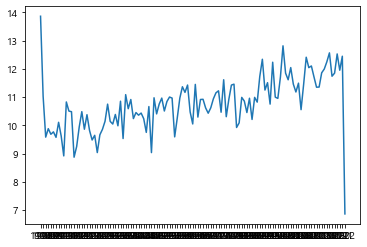

In [37]:
df_group = df.groupby('연도')['최저기온(℃)'].mean()
plt.plot(df_group)
plt.show()

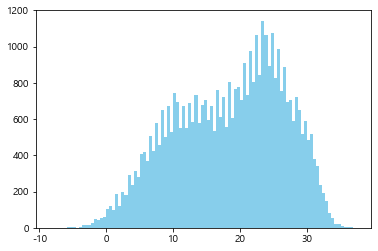

In [36]:
plt.hist(df['최고기온(℃)'], bins=100, color='skyblue')
plt.show()